In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from metadynamics_game import *
%matplotlib notebook

# setup potential coordinates
x = np.linspace(0, 6, 100)
xy = np.arange(xymin, xymax, 0.1)
coords = np.dstack(np.meshgrid(xy, xy)).reshape(-1, 2)

## Random walker in a 1 dimensional landscape

<AxesSubplot:>

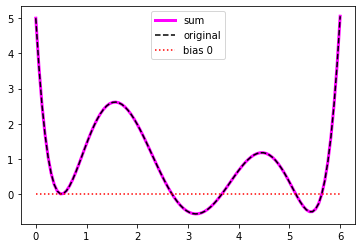

In [2]:
# we can add "Gaussians" by supplying dictionaries, e.g.
#
# dict(origin=[0.5],  # list; center coordinate(s); can be [x] or [x,y]
#     sigma=0.5,  # float; determines width of Gaussian
#     amplitude=1.  # float; determines strenght of Gaussian
#     )
# 
# we can have multiple different Gaussians, one per line.

gaussians1d = [
    dict(origin=[0.4], sigma=0.6, amplitude=0.),
    ]

%matplotlib inline
plot_triplewell_1d(x, gaussians1d, show_constituents=True)

<IPython.core.display.Javascript object>


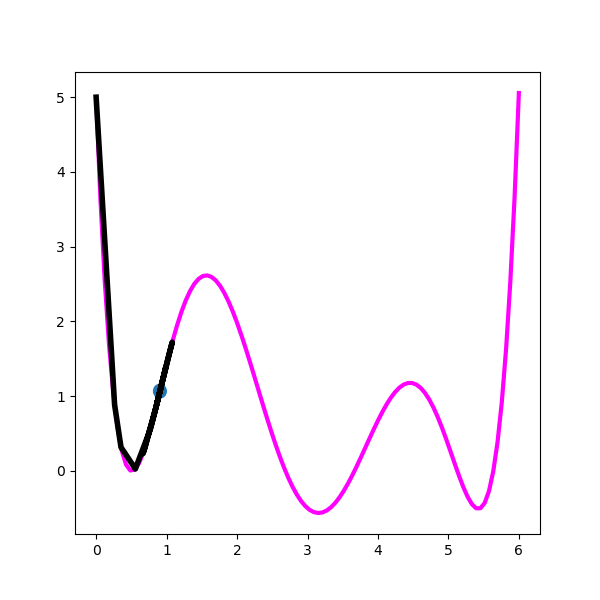

In [3]:
# this cell runs a random walk. will the point reach the right well?
# if it's very slow, add some Gaussians above!
# the random walk can be stopped by pressing the black rectangle above
# ("interrupt the kernel"-button)

%matplotlib notebook
trajectory = np.zeros((n_steps, 1))

fig, ax = plt.subplots(figsize=(6, 6))
plot_triplewell_1d(x, gaussians1d, ax=ax)

sde = custom_sde(dim=1, rhs=lambda x: total_force_1d(x, gaussians1d),
                 sigma=np.diag([1.]), h=1e-5, n_steps=1000)

while True:
    try:
        with DelayedKeyboardInterrupt():
            next_step = sde.trajectory([trajectory[-1]], 2)[1]
            trajectory = np.concatenate([trajectory[1:], next_step[None]])
            
            pltsin1d(ax, trajectory, traj_start, gaussians=gaussians1d, linewidth=4, )

            if check_found(trajectory[-1]): break

            sleep(.1)
    except KeyboardInterrupt:
        break

## Protein folding in 2 dimensions

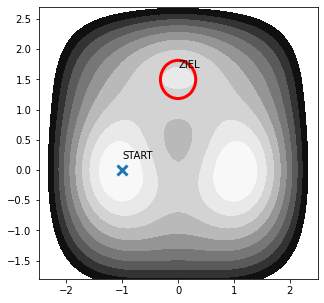

In [4]:
%matplotlib inline
# please fill in by using what you have learned above!
# note that here, the coordinate is 2-dimensional [x, y].
gaussians = [
]

potential_landscape = total_energy(coords, gaussians)
plot_landscape(potential_landscape, xy)

<IPython.core.display.Javascript object>


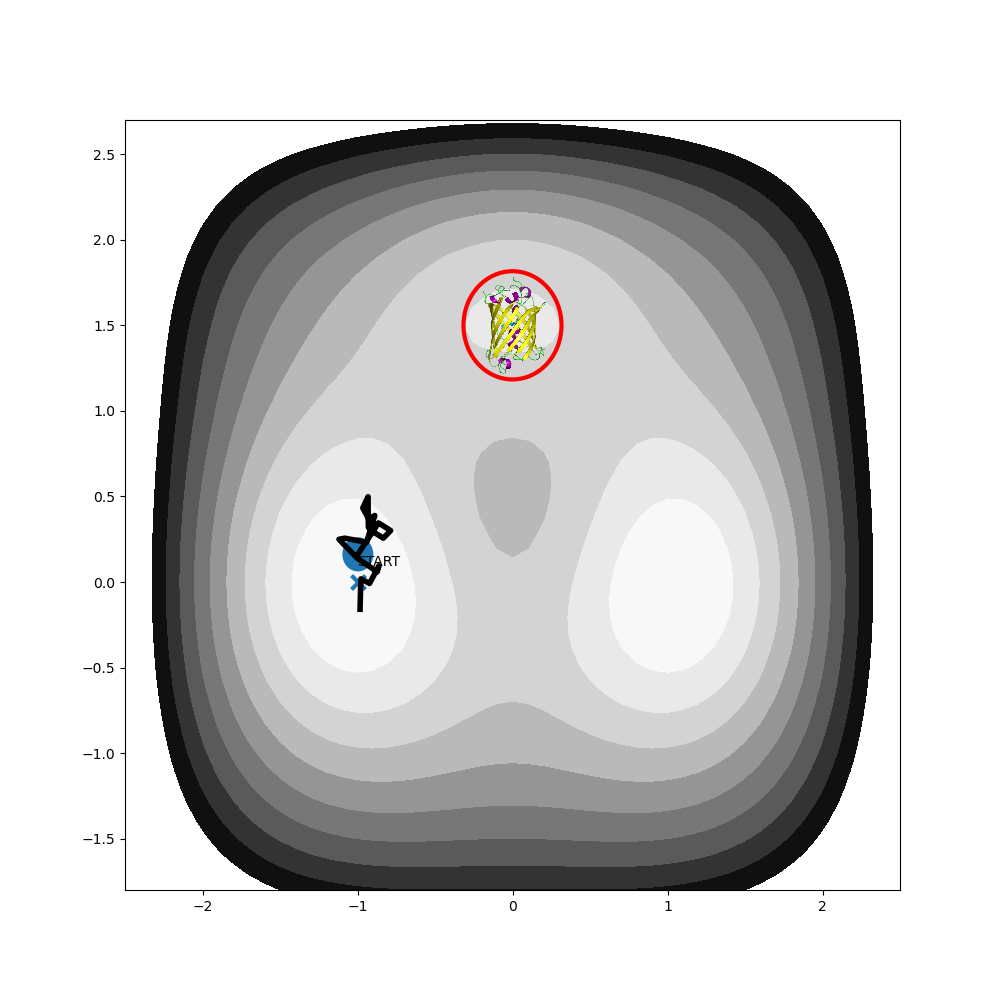

In [5]:
%matplotlib notebook

trajectory = np.zeros((n_steps, 2))
trajectory[:] = traj_start

fig, ax = plt.subplots(figsize=(10, 10))
    
plot_landscape(potential_landscape, xy, image_box=OffsetImage(image, zoom=0.15), ax=ax)

sde = custom_sde(dim=2, rhs=lambda x: total_force(x, gaussians),
                 sigma=np.diag([1., 1.]), h=1e-5, n_steps=1000)


while True:
    try:
        with DelayedKeyboardInterrupt():
            next_step = sde.trajectory([trajectory[-1]], 2)[1]
            trajectory = np.concatenate([trajectory[1:], next_step[None]])
            
            pltsin(ax, trajectory, traj_start, linewidth=4)

            if check_found(trajectory[-1]): break

            sleep(.1)
    except KeyboardInterrupt:
        break